# Урок 3. Логистическая регрессия

Небольшой шаг назад...

Линейная регрессия
![img/lr.png](img/lr.png)

- Предсказываем значение у, которые могут принимать любые значения из R
- Предсказываем через линейную комбинацию $$\vec y = X \vec w$$
- Находим оптимальные W с помощью градиентного спуска
- Функция потерь (MSE): $$L(x, y, w) = \frac{1}{2n} \sum_{i=1}^n (y_i - \vec{w}^T \vec{x}_i)^2$$

Как же предсказать значения у == 0/1 ?

-

In [2]:
import numpy as np
import matplotlib.pyplot as plt

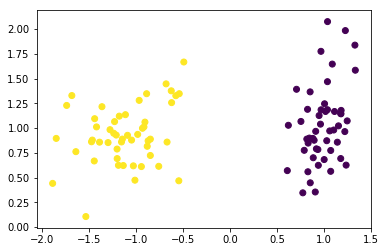

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1], c=y);

Функция потерь:  
$$L(𝑎,𝑋)=\frac{1}{l}\sum_{i=1}^n[𝑀𝑖<0]$$  
штрафуем за кол-во ошибок

In [4]:
def loss_func(x):
    return 0 if x > 0 else 1

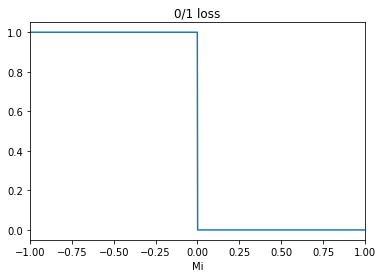

In [5]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.title('0/1 loss')
plt.plot(dots, zero_one_loss);

Логлосс:
- при у = {0;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = −\frac{1}{l}\sum_{i=1}^n(y_𝑖ln(a(x_i))+(1−y_𝑖)ln(1 - a(x_i))$$
- при у = {-1;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = - \sum_{i=1}^{\ell} \log (1 + \exp^{-a(x_i)})$$ где $$a(x_i) = y_i\vec{w}^T\vec{x_i}$$

In [6]:
def log_loss(x):
    return np.log2(1+np.exp(-x))

In [7]:
def exp_func(x):
    return np.exp(-x)

In [8]:
def square_loss(x):
    return (1 - x)**2

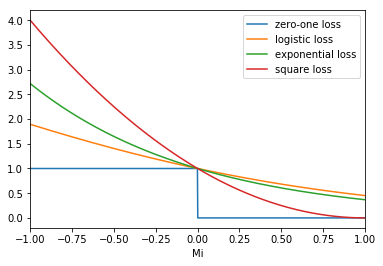

In [9]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]
log_losses = [log_loss(x) for x in dots]
exp_funces = [exp_func(x) for x in dots]
square_losses = [square_loss(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.plot(dots, zero_one_loss)
plt.plot(dots, log_losses)
plt.plot(dots, exp_funces)
plt.plot(dots, square_losses)
plt.legend(['zero-one loss', 'logistic loss', 'exponential loss', 'square loss']);

### Logreg на примере

In [10]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [11]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [12]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [13]:
def custom_StandardScaler(x):
    return (x - x.mean())/x.std()

In [14]:
X_st = X.copy()
X_st[2] = custom_StandardScaler(X_st[2])

In [15]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [16]:
def calc_logloss(y, y_pred):
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

In [17]:
y1 = np.array([0, 0])
y_pred1 = np.array([0.000001, 0.000001])

calc_logloss(y1, y_pred1)

1.000000500029089e-06

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [19]:
z = np.linspace(-10, 10, 100)

p = sigmoid(z)

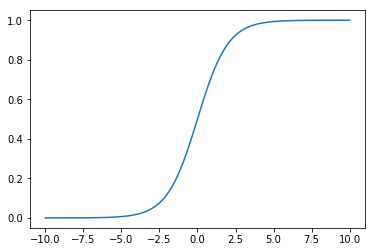

In [20]:
plt.plot(z, p);

In [21]:
def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [22]:
W = logreg_eval_model(X_st, y, iterations=1000, alpha=1e-4)

итерация: 100, logloss: 1.5996538673708376, веса: [-1.76495316  0.08730161 -1.12929916 -0.64272316]
итерация: 200, logloss: 1.5767525572049883, веса: [-1.76108551  0.09900809 -1.1279574  -0.63405146]
итерация: 300, logloss: 1.554036925497323, веса: [-1.75724337  0.11066933 -1.12660468 -0.62541634]
итерация: 400, logloss: 1.5315150976159984, веса: [-1.75342735  0.12228271 -1.12524133 -0.61681915]
итерация: 500, logloss: 1.5091958490387767, веса: [-1.74963809  0.13384536 -1.12386772 -0.60826133]
итерация: 600, logloss: 1.4870886643594083, веса: [-1.74587627  0.14535416 -1.12248429 -0.59974443]
итерация: 700, logloss: 1.465203798107477, веса: [-1.7421426   0.15680564 -1.12109157 -0.59127007]
итерация: 800, logloss: 1.443552336114085, веса: [-1.73843781  0.16819602 -1.11969016 -0.58284002]
итерация: 900, logloss: 1.4221462556853233, веса: [-1.73476267  0.17952116 -1.11828074 -0.57445613]
итерация: 1000, logloss: 1.400998482285436, веса: [-1.731118    0.19077649 -1.11686409 -0.56612042]


### Домашнее задание

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

### 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log. 

In [61]:
def calc_logloss(y, y_pred):
    y_pred_nn = y_pred.copy()
    y_pred_nn = np.where(y_pred_nn == 0, 0.0001, y_pred_nn)
    y_pred_nn = np.where(y_pred_nn == 1, 0.9999, y_pred_nn)
    err = - np.mean(y*np.log(y_pred_nn) + (1.0 - y)*np.log(1.0 - y_pred_nn))
    return np.sum(err)

y1 = np.array([1, 0])
y_pred1 = np.array([1, 0])

calc_logloss(y1, y_pred1)

0.00010000500033334732

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [24]:
def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
#        if i % (iterations) ==0:
#            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return err

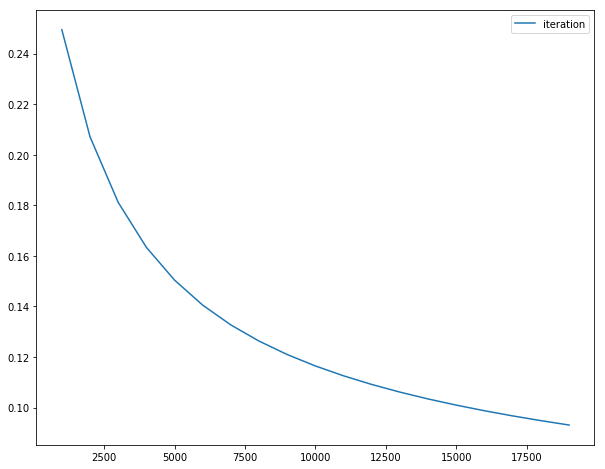

In [25]:
arr_i =  1000 * np.arange(1,20,1)
x_graph = []
y_graph = []

for i in arr_i:
    x_graph.append(i)
    y_graph.append(logreg_eval_model(X_st, y, iterations=int(i), alpha=1))

plt.figure(figsize=(10, 8))
plt.plot(x_graph, y_graph, label='iteration')
plt.legend();    

Видно, что с увеличением числа итераций logloss тоже падает -> минимизировать его не получится. Перегиб приблизительно при 5000 итераций, поэтому это число и выберем в качестве параметра.

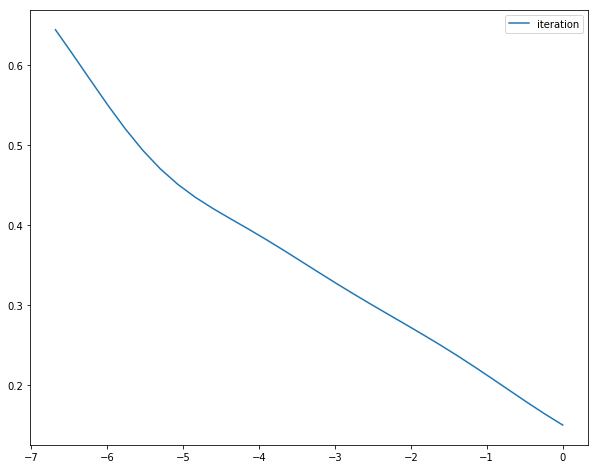

In [26]:
arr_i =  10 ** -np.arange(0,3,0.1)
x_graph = []
y_graph = []

for i in arr_i:
    x_graph.append(np.log(i))
    a = logreg_eval_model(X_st, y, iterations=5000, alpha=float(i))
    y_graph.append(a)

plt.figure(figsize=(10, 8))
plt.plot(x_graph, y_graph, label='iteration')
plt.legend();    

Можно повышать learning rate при фиксированном значении lr в разумных пределах. Фиксируем alpha = 1.

Таким образом, минимизировать значение logloss варьируя параметры функции eval_model не получится.
Низкое значение logloss получается при alpha = 1 и iterations=5000

In [27]:
logreg_eval_model(X_st, y, iterations=5000, alpha=1)

0.15043790603554427

### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))          
    return W

def calc_pred_proba(W, X):
    return sigmoid(np.dot(W,X))

In [29]:
W = logreg_eval_model(X_st, y, iterations=5000, alpha=1)
y_pred_proba = calc_pred_proba(W, X_st)
print(y_pred_proba)
print(y)

[0.34342452 0.03010765 0.99999957 0.11302196 0.88477988 0.10483569
 0.99999997 0.03468751 0.51449932 0.99998538]
[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [30]:
def calc_pred(W, X, lim = 0.5):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = (y_pred_proba > lim)
    return y_pred.astype(float)

y_pred = calc_pred(W, X_st, lim = 0.8)
print(y_pred)
    

[0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]


### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [40]:
TP = np.sum(np.where(y_pred == y, y_pred, y_pred))
FP = np.sum(np.where(y_pred != y, y_pred, 0))
TN = np.sum(np.where(y_pred == y, 1-y_pred, y_pred))
FN = np.sum(np.where(y_pred == y, 0, 1-y_pred))
print(f"Accuracy = {(TP+TN)/len(y)}")
print(f"Матрица ошибок")
print(f"\t\t y=1 \t y=0")
print(f"y_pred = 1 \t {TP} \t {FP}")
print(f"y_pred = 0 \t {FN} \t {TN}")
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print(f"Precision = {precision}, recall = {recall}")
F1 = 2*precision*recall/(precision+recall)
print(f"F1 = {F1:.3f}")

Accuracy = 0.9
Матрица ошибок
		 y=1 	 y=0
y_pred = 1 	 4.0 	 0.0
y_pred = 0 	 1.0 	 5.0
Precision = 1.0, recall = 0.8
F1 = 0.889


### 6. Могла ли модель переобучиться? Почему? 

С одной стороны - модель могла переобучиться, так как очень высокие метрики получаются. С другой стороны - модель простая, а данных мало, поэтому со 100% уверенностью о переобучении говорить не могу. Нужны еще данные.

### 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [62]:
def logreg_eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))          
    return W

def logreg_eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-6):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T) + lambda_ * W)          
    return W

print(f"{logreg_eval_model(X_st, y, iterations=5000, alpha=1)}")
print(f"{logreg_eval_model_l1(X_st, y, iterations=5000, alpha=1, lambda_=1e-3)}")
print(f"{logreg_eval_model_l2(X_st, y, iterations=5000, alpha=1, lambda_=1e-4)}")

[-26.19798575  -2.73996046  -6.84755749  21.58207918]
[-22.30227991  -2.39375165  -5.70360136  18.42065488]
[-20.95562837  -2.27654024  -5.31356891  17.32901731]
